07140147  Jose Luis Hernandez

Laboratorio 1

Satatistical Learning II

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import os

In [4]:
os.listdir()

['.config', 'drive', 'sample_data']

In [5]:
os.chdir('./drive/MyDrive/Laboratorio1')

In [6]:
import funciones_lab_uno as fn
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [7]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
data.describe()
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
data = data.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [10]:
test = test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [11]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
cat_cols, discr_cols, continues_col = fn.getColumnsDataTypes(data)

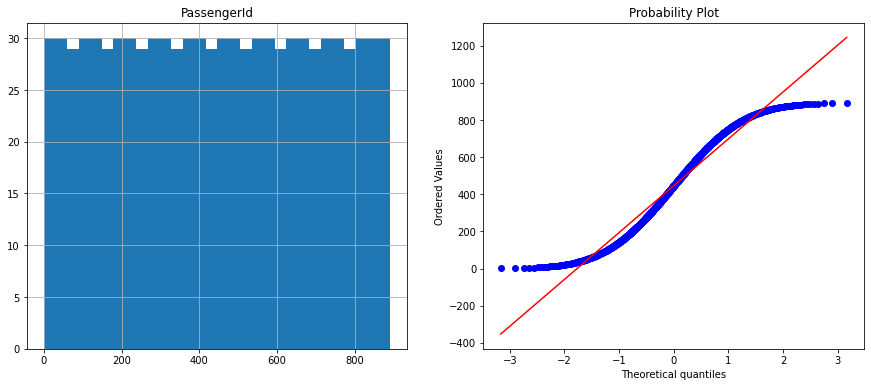

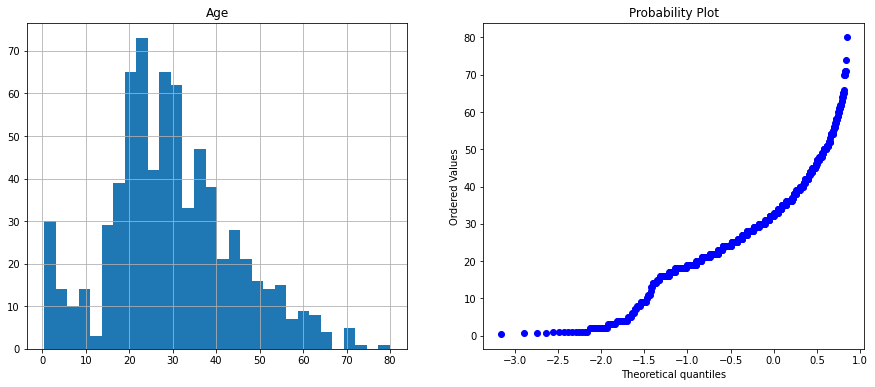

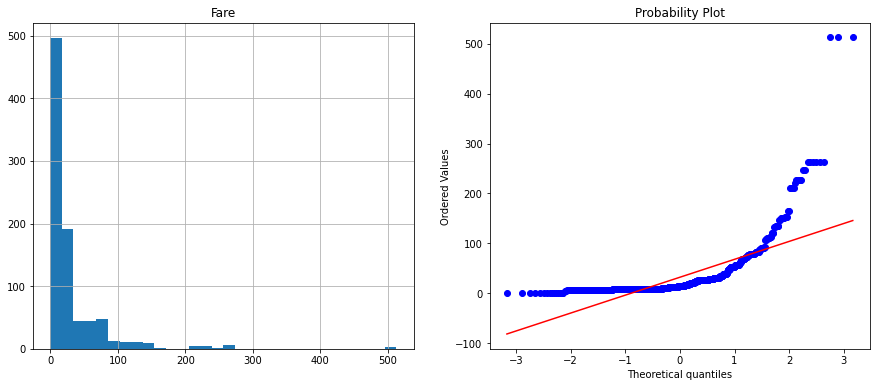

In [13]:
for col in continues_col:
    fn.plot_density_variable(data, col) 


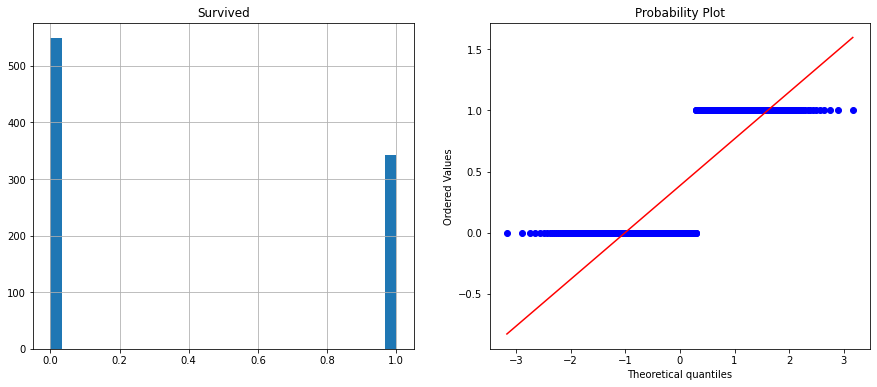

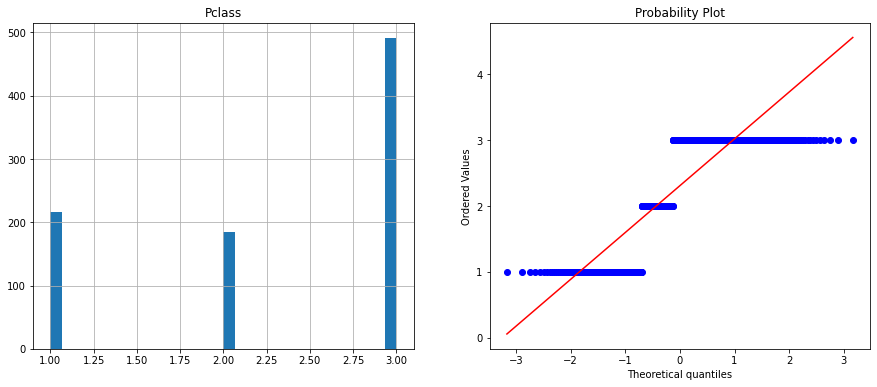

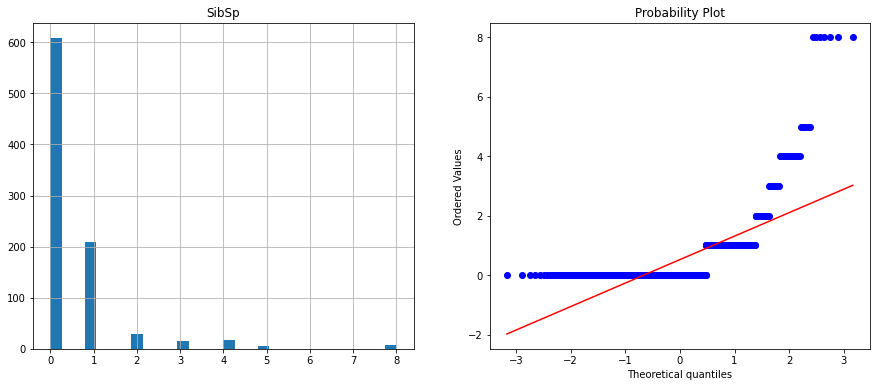

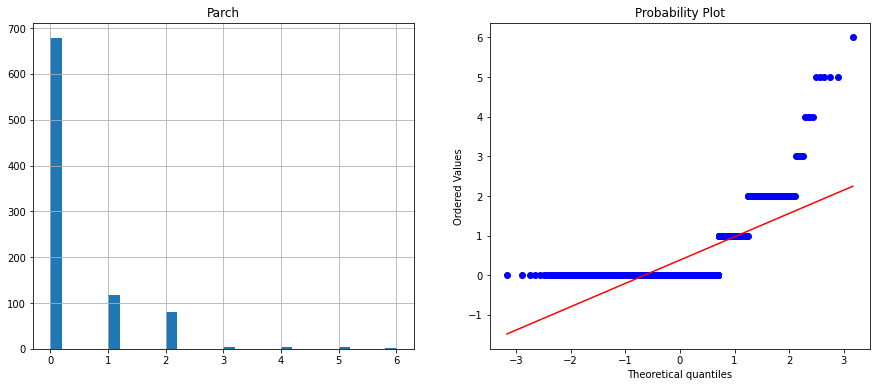

In [14]:
for col in discr_cols:
    fn.plot_density_variable(data, col) 

In [15]:
#Label encoder
data['Embarked'] = data['Embarked'].astype('category')
data['Embarked'] = data['Embarked'].cat.codes
data['Sex'] = data['Sex'].astype('category')
data['Sex'] = data['Sex'].cat.codes
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [16]:
#Label encoder
test['Embarked'] = test['Embarked'].astype('category')
test['Embarked'] = test['Embarked'].cat.codes
test['Sex'] = test['Sex'].astype('category')
test['Sex'] = test['Sex'].cat.codes
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [17]:
def getNanColNames(df):
    colnames = df.columns
    cols_con_na = []
    for col in colnames:
        if(df[col].isnull().sum() > 0):
            cols_con_na.append(col)
    return cols_con_na

In [18]:
cols_con_nan = getNanColNames(test)
cols_con_nan

['Age', 'Fare']

In [19]:
cols_con_nan = getNanColNames(data)
cols_con_nan

['Age']

In [20]:
fn.FillNaN_Corr_DF(data, 'Age', 'Sex')

La media es: 30.0
La mediana es: 28.0
0.08465991547420464
0.08116253523893895
Validacion Valores Nulos:
0


In [23]:
fn.FillNaN_Corr_DF(test, 'Age', 'Fare')

La media es: 30.0
La mediana es: 30.0
nan
nan
Validacion Valores Nulos:
0


In [24]:
test.isnull().values.any()

True

In [25]:
X_train = data.iloc[:, data.columns != 'Survived']
y_train = data.loc[:, 'Survived']

In [26]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)

In [27]:
X_test = test
X_test = std_scaler.fit_transform(X_test)

In [28]:
X_train.shape[1]

8

MODELO 1

In [35]:
inputs = X_train.shape[1]


## base sequencial  para definir la estructura de la red (simpre iniciar con sequential)
clasificador = Sequential()

## primera capa oculta
clasificador.add(Dense(input_dim = inputs, units=6,activation='relu',kernel_initializer='uniform'))

## segunda capa oculta
clasificador.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))

## capa de salida
clasificador.add(Dense(units=1, activation='sigmoid',kernel_initializer='uniform'))

In [ ]:
## parametros de optimizacion
clasificador.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

## parametros de entrenamiento
clasificador.fit(X_train, y_train, batch_size= 10, epochs= 100)

In [37]:
## guardar el modelo
path = '/content/drive/MyDrive/Laboratorio1/'
clasificador.save(path+ '6_6_sig_out.h5')

In [40]:
## cargamos la red
modelo1 = keras.models.load_model(path+'6_6_sig_out.h5')

In [55]:
## predicciones

y_preds = modelo1.predict(X_test)

In [42]:
y_preds = np.where(y_preds > 0.5, 1, 0)

In [49]:
y_preds = pd.DataFrame(y_preds, columns=['Survived'])

In [58]:
type(y_preds)

numpy.ndarray

In [45]:
y_preds.index += 892

In [46]:
y_preds.to_csv('/content/drive/MyDrive/Laboratorio1/modelo_1.csv')

#### Captura Modelo 1
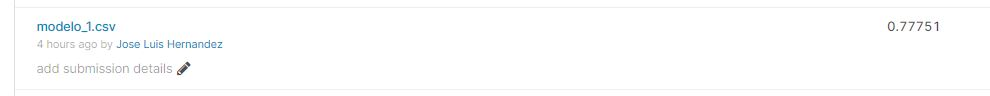

CREACION MODELO 2

In [56]:
inputs = X_train.shape[1]
clasificador = Sequential()
clasificador.add(Dense(input_dim = inputs, units=6,activation='relu',kernel_initializer='uniform'))
clasificador.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
clasificador.add(Dense(units=1, activation='sigmoid',kernel_initializer='uniform'))


In [ ]:
clasificador.compile(optimizer='SGD', loss='binary_crossentropy',metrics=['accuracy'])
clasificador.fit(X_train, y_train, batch_size= 10, epochs= 100)

In [62]:
path = '/content/drive/MyDrive/Laboratorio1/'
clasificador.save(path+ 'modelo2.h5')
modelo2 = keras.models.load_model(path+'modelo2.h5')
y_preds = modelo2.predict(X_test)
y_preds = np.where(y_preds > 0.5, 1, 0)
y_preds = pd.DataFrame(y_preds, columns=['Survived'])
y_preds.index += 892
y_preds.to_csv('/content/drive/MyDrive/Laboratorio1/modelo_2.csv')

#### Captura Modelo 2

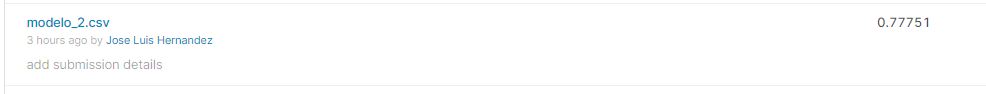

MODELO 3

In [29]:
inputs = X_train.shape[1]
clasificador = Sequential()
clasificador.add(Dense(input_dim = inputs, units=6,activation='relu',kernel_initializer='uniform'))
clasificador.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
clasificador.add(Dense(units=1, activation='sigmoid',kernel_initializer='uniform'))

In [ ]:
clasificador.compile(optimizer='SGD', loss='binary_crossentropy',metrics=['accuracy'])
clasificador.fit(X_train, y_train, batch_size= 30, epochs= 500)

In [31]:
path = '/content/drive/MyDrive/Laboratorio1/'
clasificador.save(path+ 'modelo3.h5')
modelo3 = keras.models.load_model(path+'modelo3.h5')
y_preds = modelo3.predict(X_test)
y_preds = np.where(y_preds > 0.5, 1, 0)
y_preds = pd.DataFrame(y_preds, columns=['Survived'])
y_preds.index += 892
y_preds.to_csv('/content/drive/MyDrive/Laboratorio1/modelo_3.csv')

#### Captura Modelo 3

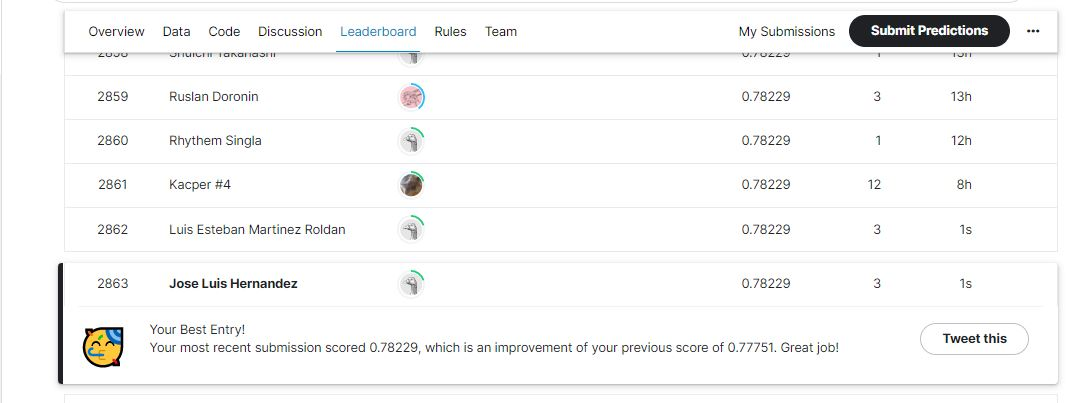

MODELO 4

In [ ]:
inputs = X_train.shape[1]
clasificador = Sequential()
clasificador.add(Dense(input_dim = inputs, units=6,activation='relu',kernel_initializer='uniform'))
clasificador.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
clasificador.add(Dense(units=1, activation='sigmoid',kernel_initializer='uniform'))
clasificador.compile(optimizer='RMSprop', loss='binary_crossentropy',metrics=['accuracy'])
clasificador.fit(X_train, y_train, batch_size= 100, epochs= 800)


In [36]:
path = '/content/drive/MyDrive/Laboratorio1/'
clasificador.save(path+ 'modelo4.h5')
modelo4 = keras.models.load_model(path+'modelo4.h5')
y_preds = modelo4.predict(X_test)
y_preds = np.where(y_preds > 0.5, 1, 0)
y_preds = pd.DataFrame(y_preds, columns=['Survived'])
y_preds.index += 892
y_preds.to_csv('/content/drive/MyDrive/Laboratorio1/modelo_4.csv')

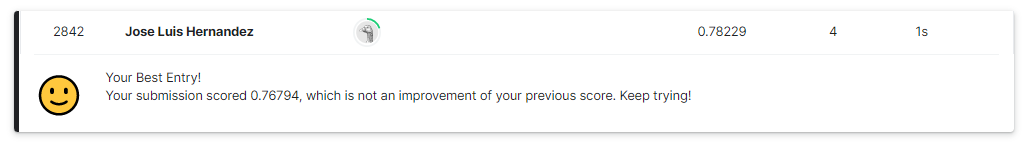

# MODELO 5

In [ ]:
inputs = X_train.shape[1]
clasificador = Sequential()
clasificador.add(Dense(input_dim = inputs, units=6,activation='relu',kernel_initializer='uniform'))
clasificador.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
clasificador.add(Dense(units=1, activation='relu',kernel_initializer='uniform'))
clasificador.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
clasificador.fit(X_train, y_train, batch_size= 100, epochs= 1500)

In [40]:
path = '/content/drive/MyDrive/Laboratorio1/'
clasificador.save(path+ 'modelo5.h5')
modelo5 = keras.models.load_model(path+'modelo5.h5')
y_preds = modelo5.predict(X_test)
y_preds = np.where(y_preds > 0.5, 1, 0)
y_preds = pd.DataFrame(y_preds, columns=['Survived'])
y_preds.index += 892
y_preds.to_csv('/content/drive/MyDrive/Laboratorio1/modelo_5.csv')

#### Captura Modelo 5
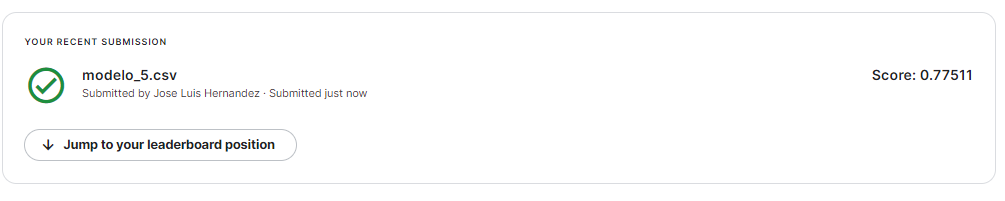

## MODELO 6

In [ ]:
inputs = X_train.shape[1]
clasificador = Sequential()
clasificador.add(Dense(input_dim = inputs, units=6,activation='relu',kernel_initializer='uniform'))
clasificador.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
clasificador.add(Dense(units=1, activation='sigmoid',kernel_initializer='uniform'))
clasificador.compile(optimizer='SGD', loss='binary_crossentropy',metrics=['accuracy'])
clasificador.fit(X_train, y_train, batch_size= 15, epochs= 2000)


In [43]:
path = '/content/drive/MyDrive/Laboratorio1/'
clasificador.save(path+ 'modelo_6.h5')
modelo_6 = keras.models.load_model(path+'modelo_6.h5')
y_preds = modelo_6.predict(X_test)
y_preds = np.where(y_preds > 0.5, 1, 0)
y_preds = pd.DataFrame(y_preds, columns=['Survived'])
y_preds.index += 892
y_preds.to_csv('/content/drive/MyDrive/Laboratorio1/modelo_6.csv')

### Captura Modelo 6
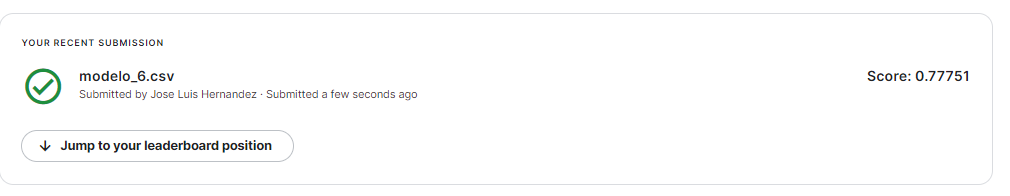

### MODELO 7


In [ ]:
inputs = X_train.shape[1]

clasificador = Sequential()
clasificador.add(Dense(input_dim = inputs, units=6,activation='relu',kernel_regularizer = None))
clasificador.add(Dense(units=14,activation='relu',kernel_regularizer = None))
clasificador.add(Dense(units=1, activation='sigmoid',kernel_regularizer = None))
clasificador.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
clasificador.fit(X_train, y_train, batch_size= 10, epochs= 1300)

In [65]:
path = '/content/drive/MyDrive/Laboratorio1/'
clasificador.save(path+ 'modelo_7.h5')
modelo_7 = keras.models.load_model(path+'modelo_7.h5')
y_preds = modelo_7.predict(X_test)
y_preds = np.where(y_preds > 0.5, 1, 0)
y_preds = pd.DataFrame(y_preds, columns=['Survived'])
y_preds.index += 892
y_preds.to_csv('/content/drive/MyDrive/Laboratorio1/modelo_7_2.csv')

## Captura Modelo 7
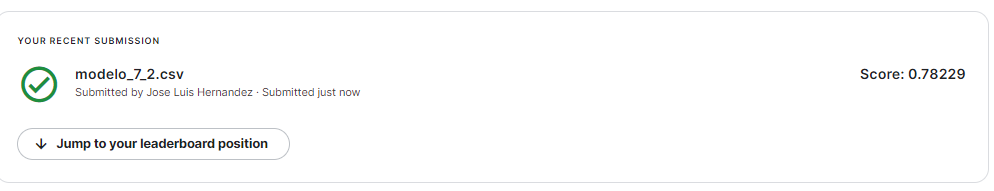

##  MODELO 8


In [ ]:
inputs = X_train.shape[1]

clasificador = Sequential()
clasificador.add(Dense(input_dim = inputs, units=6,activation='relu',kernel_regularizer = None))
clasificador.add(Dense(units=14,activation='relu',kernel_regularizer = None))
clasificador.add(Dense(units=1, activation='sigmoid',kernel_regularizer = None))
clasificador.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
clasificador.fit(X_train, y_train, batch_size= 10, epochs= 3000)

In [67]:
path = '/content/drive/MyDrive/Laboratorio1/'
clasificador.save(path+ 'modelo_8.h5')
modelo_8 = keras.models.load_model(path+'modelo_8.h5')
y_preds = modelo_8.predict(X_test)
y_preds = np.where(y_preds > 0.5, 1, 0)
y_preds = pd.DataFrame(y_preds, columns=['Survived'])
y_preds.index += 892
y_preds.to_csv('/content/drive/MyDrive/Laboratorio1/modelo_8.csv')

## Captura Modelo 8
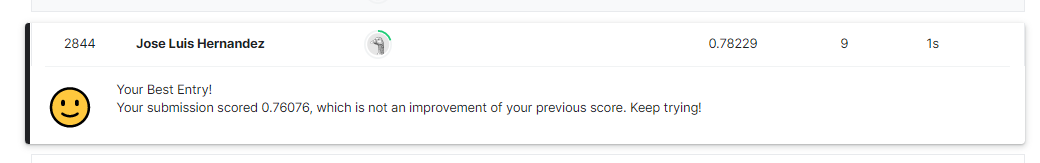